In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Datos del problema
media_reclamaciones = 200000  # Media de las reclamaciones (USD)
desviacion_reclamaciones = 50000  # Desviación estándar de las reclamaciones (USD)
num_reclamaciones = 100  # Número esperado de reclamaciones al año
costo_prima_reaseguro = 12000  # Costo de las primas de reaseguro por cada $100,000
capital_minimo = 1000000  # Capital mínimo requerido (USD)

In [3]:
# Funciones para calcular varianzas y utilidades
def varianza_retenida(alpha):
    # Varianza de las reclamaciones retenidas
    return (1 - alpha) * 2 * (num_reclamaciones * (desviacion_reclamaciones * 2))

In [4]:
def varianza_cedida(alpha):
    # Varianza de las reclamaciones cedidas
    return alpha * 2 * (num_reclamaciones * (desviacion_reclamaciones * 2))

In [5]:
def varianza_total(alpha):
    # Varianza total de las pérdidas
    return varianza_retenida(alpha) + varianza_cedida(alpha)

In [6]:
def costo_reaseguro(alpha):
    # Costo total del reaseguro
    return (alpha * media_reclamaciones / 100000) * costo_prima_reaseguro

In [7]:
def utilidad_esperada(alpha):
    # Utilidad esperada
    primas_totales = num_reclamaciones * media_reclamaciones
    perdidas_esperadas = alpha * media_reclamaciones
    costo_total_reaseguro = costo_reaseguro(alpha)
    return primas_totales - perdidas_esperadas - costo_total_reaseguro

In [8]:
# Rango de valores de α (0 a 1)
alpha_values = np.linspace(0, 1, 100)
var_ret = []
var_ced = []
var_total = []
costos = []
utilidades = []

for alpha in alpha_values:
    var_ret.append(varianza_retenida(alpha))
    var_ced.append(varianza_cedida(alpha))
    var_total.append(varianza_total(alpha))
    costos.append(costo_reaseguro(alpha))
    utilidades.append(utilidad_esperada(alpha))


In [9]:
# Encontrar el α que minimiza la varianza total y verifica el requisito de capital
mejor_indice = np.argmin(var_total)
mejor_alpha = alpha_values[mejor_indice]
mejor_var_total = var_total[mejor_indice]
mejor_utilidad = utilidades[mejor_indice]
mejor_costo = costos[mejor_indice]

In [10]:
# Resultados
print(f"Nivel óptimo de reaseguro (α): {mejor_alpha:.2f}")
print(f"Varianza total de las pérdidas: {mejor_var_total:.2f} USD")
print(f"Utilidad esperada: {mejor_utilidad:.2f} USD")
print(f"Costo total del reaseguro: {mejor_costo:.2f} USD")


Nivel óptimo de reaseguro (α): 0.09
Varianza total de las pérdidas: 20000000.00 USD
Utilidad esperada: 19979636.36 USD
Costo total del reaseguro: 2181.82 USD


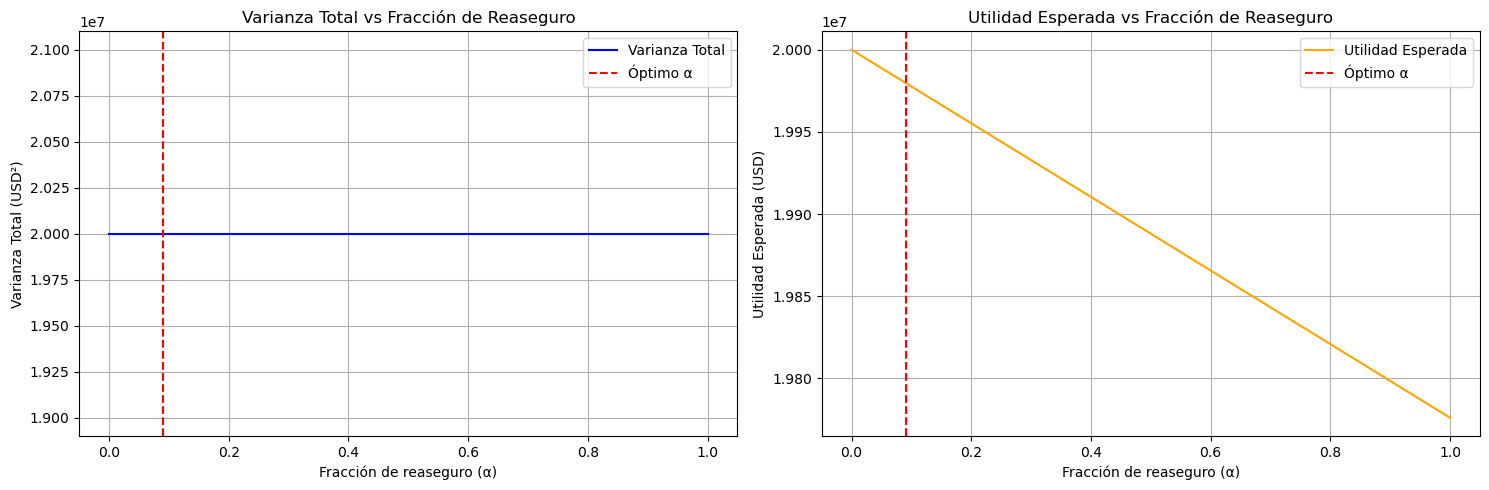

In [11]:
# Gráficas
plt.figure(figsize=(15, 5))

# Gráfica de varianza total
plt.subplot(1, 2, 1)
plt.plot(alpha_values, var_total, label='Varianza Total', color='blue')
plt.xlabel('Fracción de reaseguro (α)')
plt.ylabel('Varianza Total (USD²)')
plt.title('Varianza Total vs Fracción de Reaseguro')
plt.axvline(mejor_alpha, color='red', linestyle='--', label='Óptimo α')
plt.legend()
plt.grid()

# Gráfica de utilidad esperada
plt.subplot(1, 2, 2)
plt.plot(alpha_values, utilidades, label='Utilidad Esperada', color='orange')
plt.xlabel('Fracción de reaseguro (α)')
plt.ylabel('Utilidad Esperada (USD)')
plt.title('Utilidad Esperada vs Fracción de Reaseguro')
plt.axvline(mejor_alpha, color='red', linestyle='--', label='Óptimo α')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()